## Train a simple convnet on the Fashion MNIST dataset

In this, we will see how to deal with image data and train a convnet for image classification task.

### Load the  `fashion_mnist`  dataset

** Use keras.datasets to load the dataset **

In [1]:
import tensorflow as tf
import keras
from keras.callbacks import EarlyStopping
import numpy as np
import pandas as pd

Using TensorFlow backend.


In [2]:
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

### Find no.of samples are there in training and test datasets

In [3]:
print(f"x_train = {len(x_train)} and x_test = {len(x_test)}")


x_train = 60000 and x_test = 10000


In [4]:
print(f"y_train = {len(y_train)} and y_test = {len(y_test)}")

y_train = 60000 and y_test = 10000


### Find dimensions of an image in the dataset

In [5]:
x_train.shape

(60000, 28, 28)

### Convert train and test labels to one hot vectors

** check `keras.utils.to_categorical()` **

In [6]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [7]:
from keras.utils import to_categorical

In [8]:
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

### Reshape the data from 28x28 to 28x28x1 to match input dimensions in Conv2D layer in keras

In [9]:
x_train=x_train.reshape(x_train.shape[0],28,28,1).astype('float32')
x_test=x_test.reshape(x_test.shape[0],28,28,1).astype('float32')

In [10]:
x_train.shape

(60000, 28, 28, 1)

### Normalize both the train and test image data from 0-255 to 0-1

In [11]:
x_train/=255
x_test/=255

### Import the necessary layers from keras to build the model

In [12]:
from keras.models import Sequential
from keras.layers.core import Dense,Dropout,Activation,Flatten
from keras.layers.convolutional import Conv2D,MaxPooling2D
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

### Build a model 

** with 2 Conv layers having `32 3*3 filters` in both convolutions with `relu activations` and `flatten` before passing the feature map into 2 fully connected layers (or Dense Layers) having 128 and 10 neurons with `relu` and `softmax` activations respectively. Now, using `categorical_crossentropy` loss with `adam` optimizer train the model with early stopping `patience=5` and no.of `epochs=10`. **

In [13]:
input_shape = (28,28,1)
num_classes =10

model = Sequential() 
model.add(Conv2D(32, kernel_size=(3, 3), strides=(1, 1), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
#model.add(Conv2D(128, (3, 3), activation='relu'))
#model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu')) 
model.add(Dense(num_classes, activation='softmax'))

early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, verbose=1, mode='auto')
callback_list = [early_stopping]

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)              

### Now, to the above model add `max` pooling layer of `filter size 2x2` and `dropout` layer with `p=0.25` after the 2 conv layers and run the model

In [15]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

In [16]:
batch_size=100
epochs = 10

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 108us/step - loss: 0.6024 - accuracy: 0.7801 - val_loss: 0.4258 - val_accuracy: 0.8472
Epoch 2/10
60000/60000 [==============================] - 5s 82us/step - loss: 0.3983 - accuracy: 0.8566 - val_loss: 0.3562 - val_accuracy: 0.8731
Epoch 3/10
60000/60000 [==============================] - 5s 81us/step - loss: 0.3470 - accuracy: 0.8732 - val_loss: 0.3219 - val_accuracy: 0.8857
Epoch 4/10
60000/60000 [==============================] - 5s 81us/step - loss: 0.3182 - accuracy: 0.8829 - val_loss: 0.3115 - val_accuracy: 0.8891
Epoch 5/10
60000/60000 [==============================] - 5s 81us/step - loss: 0.2945 - accuracy: 0.8920 - val_loss: 0.2825 - val_accuracy: 0.8966
Epoch 6/10
60000/60000 [==============================] - 5s 82us/step - loss: 0.2770 - accuracy: 0.8971 - val_loss: 0.2821 - val_accuracy: 0.8980
Epoch 7/10
60000/60000 [==============================] - 5s 81us/s

Report:

In [17]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.258218787920475
Test accuracy: 0.9034000039100647


### Now, to the above model, lets add Data Augmentation 

### Import the ImageDataGenrator from keras and fit the training images

In [18]:
# example of random rotation image augmentation
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
#datagen = ImageDataGenerator()
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)
datagen.fit(x_train)
it = datagen.flow(x_train, y_train)
model.fit_generator(it, steps_per_epoch=(len(x_train)/32), epochs =10, verbose=1, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.7158 - accuracy: 0.7355 - val_loss: 0.3876 - val_accuracy: 0.8536
Epoch 2/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.5681 - accuracy: 0.7896 - val_loss: 0.4173 - val_accuracy: 0.8362
Epoch 3/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.5290 - accuracy: 0.8046 - val_loss: 0.3631 - val_accuracy: 0.8720
Epoch 4/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.5023 - accuracy: 0.8136 - val_loss: 0.3909 - val_accuracy: 0.8619
Epoch 5/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.4836 - accuracy: 0.8217 - val_loss: 0.3835 - val_accuracy: 0.8614
Epoch 6/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.4703 - accuracy: 0.8248 - val_loss: 0.3830 - val_accuracy: 0.8560
Epoch 7/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.4636 - accuracy: 0.8282 - val_loss: 0.3693 - val_ac

#### Showing 5 versions of the first image in training dataset using image datagenerator.flow()

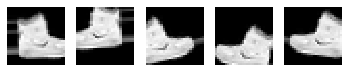

In [20]:
from matplotlib import pyplot as plt
gen = datagen.flow(x_train[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()

### Run the above model using fit_generator()

###  Report the final train and validation accuracy

In [21]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.37781092044115067
Test accuracy: 0.8601999878883362


## **DATA AUGMENTATION ON CIFAR10 DATASET**

One of the best ways to improve the performance of a Deep Learning model is to add more data to the training set. Aside from gathering more instances from the wild that are representative of the distinction task, we want to develop a set of methods that enhance the data we already have. There are many ways to augment existing datasets and produce more robust models. In the image domain, these are done to utilize the full power of the convolutional neural network, which is able to capture translational invariance. This translational invariance is what makes image recognition such a difficult task in the first place. You want the dataset to be representative of the many different positions, angles, lightings, and miscellaneous distortions that are of interest to the vision task.

### **Import neessary libraries for data augmentation**

In [22]:
from keras.datasets import cifar10
from keras.utils import np_utils

### **Load CIFAR10 dataset**

In [23]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [24]:
X_train.shape

(50000, 32, 32, 3)

In [25]:
X_train = X_train.reshape(X_train.shape[0],32,32,3).astype('float32')
X_test = X_test.reshape(X_test.shape[0],32,32,3).astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

In [26]:
X_train.shape

(50000, 32, 32, 3)

In [27]:
y_train = np_utils.to_categorical(y_train, num_classes=10)
y_test = np_utils.to_categorical(y_test, num_classes=10)

In [28]:
input_shape = (32,32,3)
num_classes =10

model_2 = Sequential()
model_2.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), padding='valid', activation='relu'))
model_2.add(Dropout(0.2))
model_2.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model_2.add(MaxPooling2D())
model_2.add(Dropout(0.2))
model_2.add(Conv2D(64, (5, 5), activation='relu', padding='same'))
model_2.add(MaxPooling2D())
model_2.add(Dropout(0.2))
model_2.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model_2.add(MaxPooling2D())
model_2.add(Flatten())
model_2.add(Dense(512, activation='relu'))
model_2.add(Dropout(0.5))
model_2.add(Dense(num_classes, activation='softmax'))

early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, verbose=1, mode='auto')
callback_list = [early_stopping]

In [29]:
model_2.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adamax',
              metrics=['accuracy'])

### **Create a data_gen funtion to genererator with image rotation,shifting image horizontally and vertically with random flip horizontally.**

In [31]:
datagen_2 = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    vertical_flip=True,
    horizontal_flip=True)

### **Prepare/fit the generator.**

In [32]:
datagen_2.fit(X_train)

In [33]:
model_2.fit_generator(datagen_2.flow(X_train, y_train, batch_size=32), epochs=10, verbose=1, validation_data=(X_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 26s 16ms/step - loss: 1.8747 - accuracy: 0.2811 - val_loss: 1.5741 - val_accuracy: 0.4116
Epoch 2/10
1563/1563 [==============================] - 27s 17ms/step - loss: 1.6298 - accuracy: 0.3958 - val_loss: 1.3835 - val_accuracy: 0.4911
Epoch 3/10
1563/1563 [==============================] - 28s 18ms/step - loss: 1.4889 - accuracy: 0.4555 - val_loss: 1.2596 - val_accuracy: 0.5365
Epoch 4/10
1563/1563 [==============================] - 30s 19ms/step - loss: 1.3920 - accuracy: 0.4960 - val_loss: 1.1698 - val_accuracy: 0.5780
Epoch 5/10
1563/1563 [==============================] - 31s 20ms/step - loss: 1.3212 - accuracy: 0.5239 - val_loss: 1.1211 - val_accuracy: 0.5925
Epoch 6/10
1563/1563 [==============================] - 31s 20ms/step - loss: 1.2676 - accuracy: 0.5464 - val_loss: 1.0960 - val_accuracy: 0.6114
Epoch 7/10
1563/1563 [==============================] - 29s 19ms/step - loss: 1.2246 - accuracy: 0.5607 - val_loss: 1.0263 -

In [35]:
score = model_2.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.9958250204086304
Test accuracy: 0.6449999809265137


### **Generate 5 images for 1 of the image of CIFAR10 train dataset.**

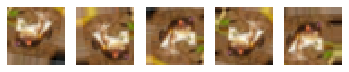

In [36]:
from matplotlib import pyplot as plt
gen = datagen_2.flow(X_train[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze())
    plt.plot()
plt.show()